# Numpy Arrfay Examples

### introduction to convolution
DS 3000
May 17, 2023


In [1]:
# A demonstration of some image-generation capabilities of numpy



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SIZE = 200

# give size as tuple
image = np.zeros((SIZE,SIZE), dtype=int)

for i in range(SIZE):
    # for every i value, consider i value
    for j in range(SIZE):
        # % means reminder
        image[i,j] = (i*i + j*j) % 256
        
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='Spectral', interpolation='hamming')
plt.show()

In [ ]:
range(5)

In [ ]:
range(10**100)

range(0, 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000)

In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

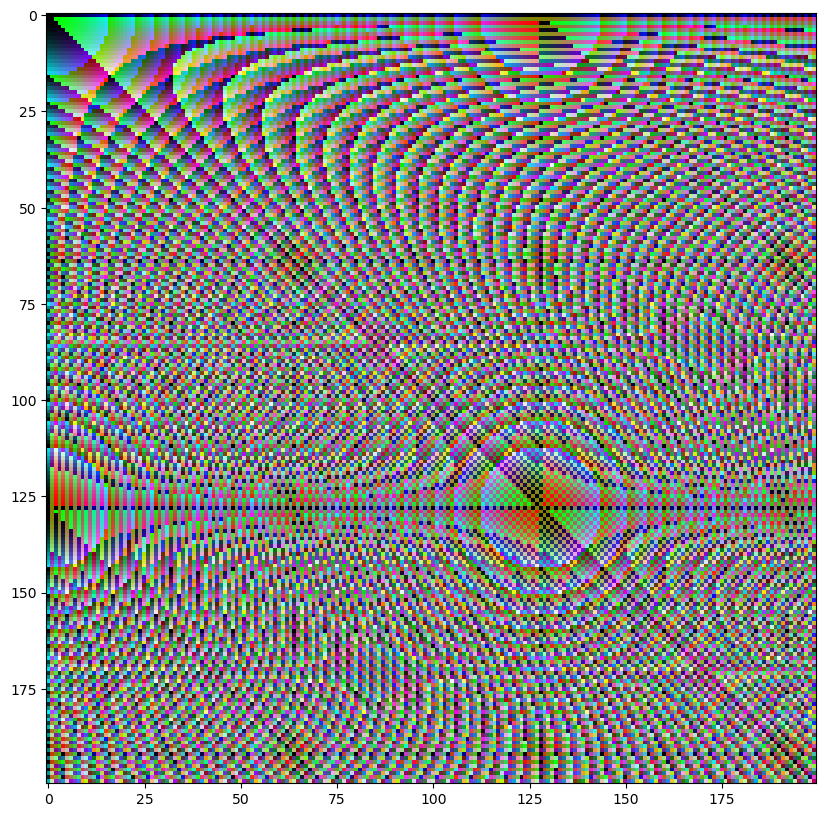

In [7]:
# 3D image
SIZE = 200

image = np.zeros((SIZE,SIZE, 3), dtype=int)
for i in range(SIZE):
    for j in range(SIZE):
        red = (i * j) % 256
        green = (i*i - j*i) % 256
        blue = (i*i + j*j) % 256        
        image[i,j] = [red, green, blue]
        
        # image[i, j, 0] = red
        # image[i, j, 1] = green
        # image [i, j, 2] = blue
        
        
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='Spectral', interpolation='None')
plt.show()

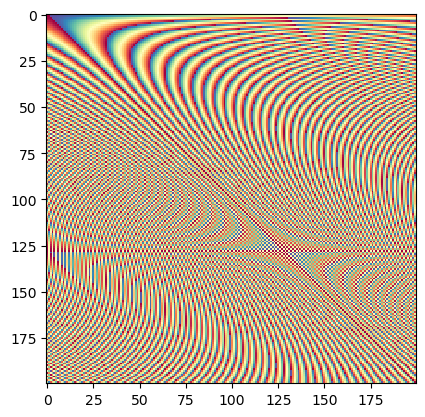

In [8]:
plt.imshow(image[:,:,1], cmap='Spectral', interpolation='None')
plt.show()

In [9]:
import matplotlib.image as img

def show_image(image):
    plt.imshow(image)
    plt.xlabel('j')
    plt.ylabel('i')
    plt.show()


# crop the image
def crop(image, fr, to):
    """
    Crop an image
    fr - upper left coordinate (tuple)
    to - lower right coordinate (tuple)
    return the cropped image e.g., (400,0) to (1000,600)
    """
    
    cropped = image[fr[0]:to[0], fr[1]:to[1]]
    return cropped


def blur(image, level=10):
    blurry = image.copy()
    for i in range(level, image.shape[0]-level):
        for j in range(level, image.shape[1]-level):
            
            # Blur each channel!
            for ch in range(4):
                blurry[i,j,ch] = image[i-level:i+level, j-level:j+level, ch].mean()
    return blurry


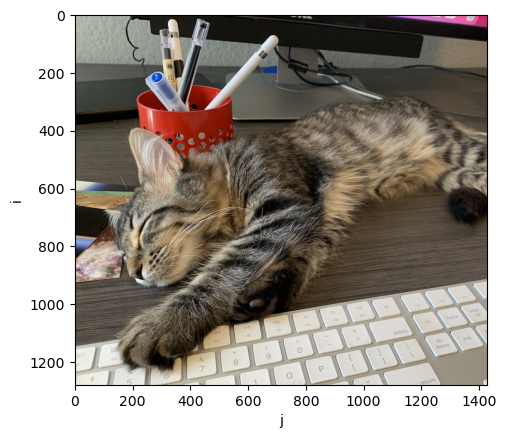

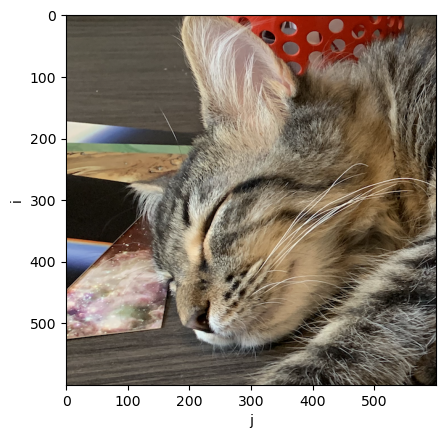

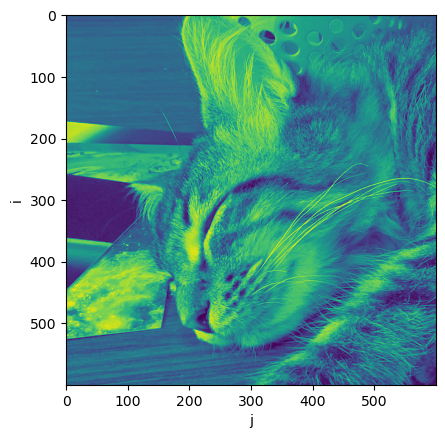

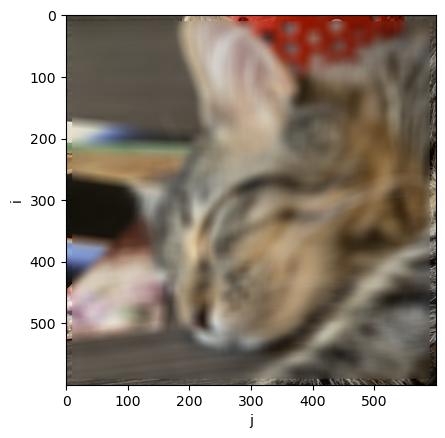

In [10]:
# Read the image into a numpy array
original = img.imread('asteroid.png')
# specify from and to
cropped = crop(original, (400,0), (1000,600))
# colormap
cm = crop(original, (400,0), (1000,600))[:,:,0]
blurred = blur(cropped, level=10)

show_image(original)
show_image(cropped)
show_image(cm)
show_image(blurred)

In [11]:
original.shape

(1280, 1428, 4)

In [12]:
cropped.shape

(600, 600, 4)

In [13]:
# Using convolution instead

sobel = np.array(
    [[1, 0, -1], 
     [2, 0, -2], 
     [1, 0, -1]])

edge = np.array(
    [[1, 1, 1], 
     [1, -8, 1], 
     [1, 1, 1]])

blur = np.full((20,20), 1/400)
blur

array([[0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025],
       [0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
   

In [14]:
import scipy.ndimage as ndi # Multi-dimensional image processing


def convolve(image, kernel):

    r = ndi.convolve(image[:, :, 0], kernel)
    g = ndi.convolve(image[:, :, 1], kernel)
    b = ndi.convolve(image[:, :, 2], kernel)

    rslt = np.stack([r,g,b], axis=2)
    return rslt

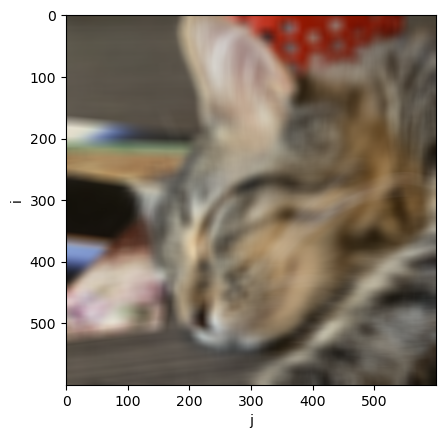

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


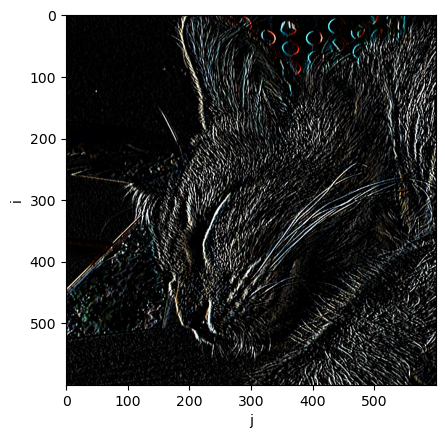

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


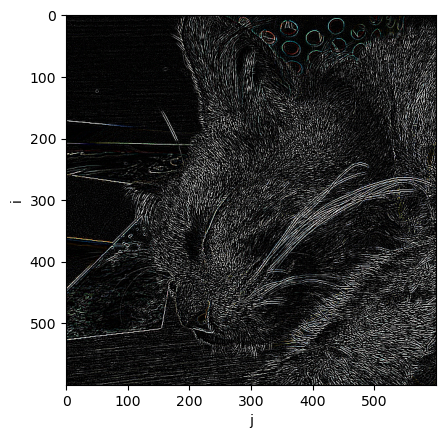

In [15]:

show_image(convolve(cropped, blur))
show_image(convolve(cropped, sobel))
show_image(convolve(cropped, edge))
